In [1]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pywt
import pandas as pd

In [2]:
file_name = '../CH4 954 ppm raw/00'
df_01 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
# print(df_01)


for i in range(1,100):
    ind = i if i>=10 else f"0{i}"
    file_name = f"../CH4 954 ppm raw/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"")
    df_01 = pd.concat([df_01, df], ignore_index=True)
print(df_01)

             x           y0          y1        y2          y3
0            0  820507000.0 -14444500.0 -227840.0 -13735900.0
1            1  859676000.0  -6947580.0 -219392.0 -12532000.0
2            2  833578000.0    829952.0 -211968.0 -13924400.0
3            3  905413000.0   8641790.0 -206080.0 -16608000.0
4            4  806905000.0  15951100.0 -196608.0 -16278500.0
...        ...          ...         ...       ...         ...
9599995  95995  702471000.0 -23103000.0 -188928.0 -11244300.0
9599996  95996  786943000.0 -16965100.0 -192512.0 -13622000.0
9599997  95997  834429000.0  -9716480.0 -176128.0 -12947500.0
9599998  95998  827305000.0  -1933570.0 -163840.0 -12815100.0
9599999  95999  863073000.0   5976830.0 -177408.0 -15446000.0

[9600000 rows x 5 columns]


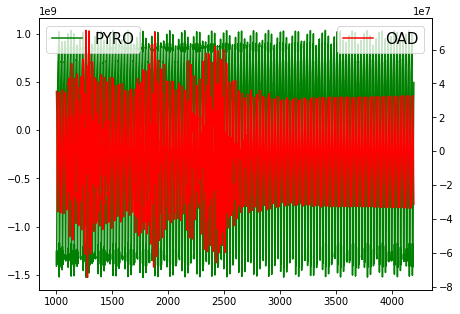

In [3]:
Size_pyro = 9_600_000
slace = 1_000
segment_size = 3_200

# plt.plot(df_01.y1[slace:slace+segment_size])
# plt.plot(df_01.y0[slace:slace+segment_size])



fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(df_01.y0[slace:slace+segment_size], color='green', label = 'PYRO')
ax2.plot(df_01.y1[slace:slace+segment_size], color='red', label='OAD')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')



In [4]:
import numpy as np
import scipy.integrate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.optimize import curve_fit
import math

SAMPLE_RATE = 48_000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION


min_freq = 1_500
max_freq = 2_000



xf = rfftfreq(N, 1 / SAMPLE_RATE)

for j, freq_xf in enumerate(xf):
    if freq_xf > min_freq:
        min_ind = j-1
        break
for j, freq_xf in enumerate(xf):
    if freq_xf > max_freq:
        max_ind = j-1
        break
print(min_freq, xf[min_ind])
print(max_freq, xf[max_ind])

        
        
# min_freq = 1760
# max_freq = 1820


point_number = int(Size_pyro/N)
max_intensity_OAD = np.zeros(point_number)
max_index_OAD = np.zeros(point_number)
max_intensity_Pyro = np.zeros(point_number)
max_index_Pyro = np.zeros(point_number)

for i in range(point_number):
    Pyro = df_01.y0.values[i*N:i*N+N]
    OAD = df_01.y1.values[i*N:i*N+N]

    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)

    max_intensity_OAD[i] = np.max(np.abs(OAD_f[min_ind:max_ind]))
    max_index_OAD[i] = np.argmax(np.abs(OAD_f[min_ind:max_ind]))
    max_intensity_Pyro[i] = np.max(np.abs(Pyro_f[min_ind:max_ind]))
    max_index_Pyro[i] = np.argmax(np.abs(Pyro_f[min_ind:max_ind]))
#     print(xf[min_freq + np.argmax(np.abs(Pyro_f[min_freq:max_freq]))])
#     print(xf[min_freq + np.argmax(np.abs(OAD_f[min_freq:max_freq]))])
# print(max_index_OAD+min_ind)
# print(max_index_Pyro+min_ind)

1500 1500.0
2000 2000.0


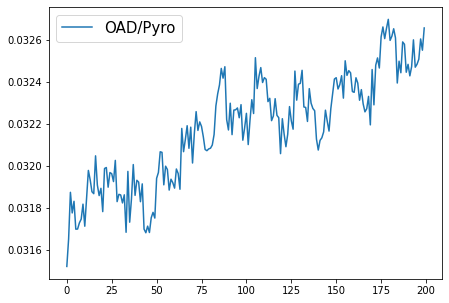

In [5]:
S_fourier = max_intensity_OAD/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

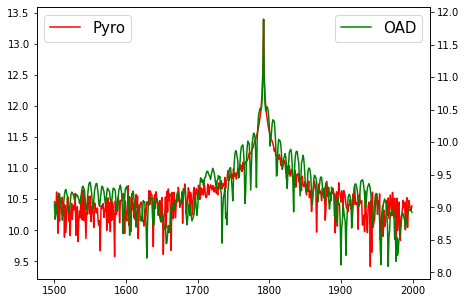

In [6]:
Pyro = df_01.y0.values[slace:slace+N]
Pyro_f = rfft(Pyro)

OAD = df_01.y1.values[slace:slace+N]
OAD_f = rfft(OAD)

fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_ind:max_ind], np.log10(np.abs(Pyro_f[min_ind:max_ind])), 'red', label='Pyro')
ax2.plot(xf[min_ind:max_ind], np.log10(np.abs(OAD_f[min_ind:max_ind])), color='green', label='OAD')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')


In [7]:
SAMPLE_RATE = 48_000 #Hz
# Number of samples in normalized_tone
N = segment_size
DURATION = N/SAMPLE_RATE #sec


xf = rfftfreq(N, 1 / SAMPLE_RATE)

for j, freq_xf in enumerate(xf):
    if freq_xf > min_freq:
        min_ind = j-1
        break
for j, freq_xf in enumerate(xf):
    if freq_xf > max_freq:
        max_ind = j-1
        break
        
print(min_freq, xf[min_ind])
print(max_freq, xf[max_ind])

point_number = int(Size_pyro/N)
# print(point_number)
max_intensity_OAD = np.zeros(point_number)
max_index_OAD = np.zeros(point_number)
max_intensity_Pyro = np.zeros(point_number)
max_index_Pyro = np.zeros(point_number)


for i in range(point_number):
    
    Pyro = df_01.y0.values[i*N:i*N + N]
#     print(len(Pyro))
    OAD = df_01.y1.values[i*N:i*N + N]

    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)

    max_intensity_OAD[i] = np.max(np.abs(OAD_f[min_ind:max_ind]))
    max_index_OAD[i] = np.argmax(np.abs(OAD_f[min_ind:max_ind]))
    max_intensity_Pyro[i] = np.max(np.abs(Pyro_f[min_ind:max_ind]))
    max_index_Pyro[i] = np.argmax(np.abs(Pyro_f[min_ind:max_ind]))

#     print(xf[min_freq + np.argmax(np.abs(Pyro_f[min_freq:max_freq]))])
#     print(xf[min_freq + np.argmax(np.abs(OAD_f[min_freq:max_freq]))])
print(xf[min_ind+int(max_index_OAD.min())],xf[min_ind+int(max_index_OAD.max())])
print(xf[min_ind+int(max_index_Pyro.min())],xf[min_ind+int(max_index_Pyro.max())])



1500 1500.0
2000 1995.0
1785.0 1800.0
1785.0 1785.0


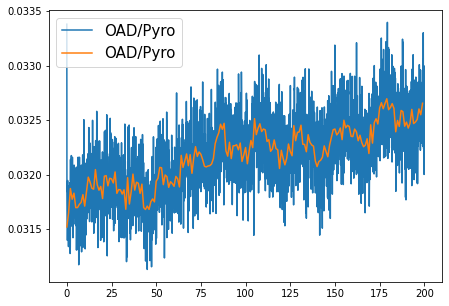

In [8]:
S_fourier_point = max_intensity_OAD/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot(np.arange(0,200,segment_size/SAMPLE_RATE),S_fourier_point, label='OAD/Pyro')
ax1.plot(np.arange(0,200,1),S_fourier, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

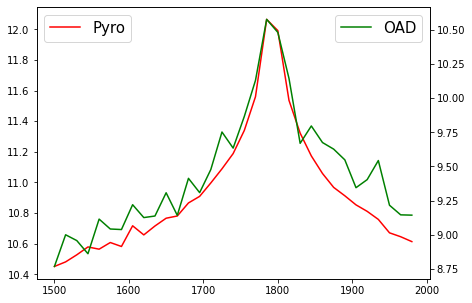

In [9]:
Pyro = df_01.y0.values[slace:slace+N]
Pyro_f = rfft(Pyro)

OAD = df_01.y1.values[slace:slace+N]
OAD_f = rfft(OAD)


fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_ind:max_ind], np.log10(np.abs(Pyro_f[min_ind:max_ind])), 'red', label='Pyro')
ax2.plot(xf[min_ind:max_ind], np.log10(np.abs(OAD_f[min_ind:max_ind])), color='green', label='OAD')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')


In [10]:
wt = 'db1'
md = 'periodic'
lev = 6

Pyro = df_01.y0[:segment_size]
Oad = df_01.y1[:segment_size]

wp_oad = pywt.WaveletPacket(data=Oad, wavelet = wt, mode=md)
wp_pyro = pywt.WaveletPacket(data=Pyro, wavelet = wt, mode=md)

print(wp_oad.maxlevel)

print('Segment Size:', segment_size)
print('Size wp[a]:',len(wp_oad['a'].data))

list_natur = [node.path for node in wp_oad.get_level(lev, 'natural')] 

print('decomposition ' + str(lev) + ': ',len(list_natur))


matrix_data = np.zeros((2,len(list_natur), len(wp_oad[list_natur[0]].data)))
# print([node.path for node in wp_oad.get_level(6, 'freq')])


for j,coeff in enumerate(list_natur):
    matrix_data[0][j] = wp_pyro[coeff].data
    matrix_data[1][j] = wp_oad[coeff].data
                       
print(matrix_data.shape)
    
    
    
    
for i in range(int(Size_pyro/segment_size)):
    Pyro = df_01.y0[i*segment_size:(i+1)*segment_size]
    Oad = df_01.y1[i*segment_size:(i+1)*segment_size]
    wp_oad = pywt.WaveletPacket(data=Oad, wavelet = wt, mode=md)
    wp_pyro = pywt.WaveletPacket(data=Pyro, wavelet = wt, mode=md)
    for j,coeff in enumerate(list_natur):
        matrix_data[0][j] = wp_pyro[coeff].data
        matrix_data[1][j] = wp_oad[coeff].data
    np.savez_compressed('data_segment/natur_X/954_'+str(i), matrix_data)

11
Segment Size: 3200
Size wp[a]: 1600
decomposition 6:  64
(2, 64, 50)


In [14]:
loaded = np.load('data_segment/natur_X/954_0.npz')
print(loaded['arr_0'].shape)

(2, 64, 50)


        target    SMA_15
0     0.033380  0.031927
1     0.031847  0.031870
2     0.031906  0.031824
3     0.031767  0.031804
4     0.031668  0.031780
...        ...       ...
2995  0.032328  0.032592
2996  0.032618  0.032549
2997  0.032302  0.032565
2998  0.032003  0.032578
2999  0.032995  0.032487

[3000 rows x 2 columns]


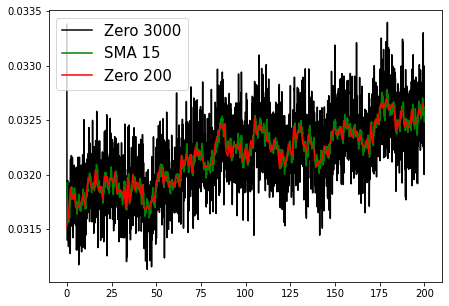

In [15]:
target_data = pd.DataFrame(S_fourier_point, columns = ['target'])
target_data['SMA_15'] = target_data.target.rolling(15, min_periods=1, center = True).mean()

print(target_data)

fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)

ax1.plot(np.arange(0,200,segment_size/SAMPLE_RATE),target_data.target, color = 'black', label='Zero 3000')
# ax1.plot(np.arange(0,200,segment_size/SAMPLE_RATE), target_data.SMA_5, color = 'yellow', label = 'SMA 5')
ax1.plot(np.arange(0,200,segment_size/SAMPLE_RATE), target_data.SMA_15, color = 'green', label = 'SMA 15')

ax1.plot(np.arange(0,200,1), S_fourier, color = 'red', label='Zero 200')


ax1.legend(prop={'size': 15})

In [18]:
np.savez_compressed('data_segment/Y_natur_954',target_data['SMA_15'])
loaded = np.load('data_segment/Y_natur_954.npz')
print(loaded['arr_0'].shape)

(3000,)


$$\bf 9.7 \ \ \ ppm$$

In [19]:
file_name = '../raw2/9,7 ppm CH4/001'
df_01 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 



for i in range(1,100):
    ind = f"0{i}" if i>=10 else f"00{i}"
    file_name = f"../raw2/9,7 ppm CH4/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"")
    df_01 = pd.concat([df_01, df], ignore_index=True)
print(df_01)

             x            y0      y1      y2          y3
0            0  6.169220e+08 -119552 -160000 -15325400.0
1            1  5.276450e+08  -41728 -173312 -15290100.0
2            2 -1.172180e+09   -6912 -168448 -13454100.0
3            3 -1.507900e+09   27136 -151552  -2473730.0
4            4 -1.396450e+09   41728 -162816   1583620.0
...        ...           ...     ...     ...         ...
9599995  95995  4.407080e+08 -717824 -153088   3948030.0
9599996  95996  4.240560e+08 -749312 -163328   2899710.0
9599997  95997  4.891790e+08 -750336 -151040     10240.0
9599998  95998  4.864580e+08 -750080 -143360  -7594750.0
9599999  95999  5.304660e+08 -725760 -153344  -8709890.0

[9600000 rows x 5 columns]


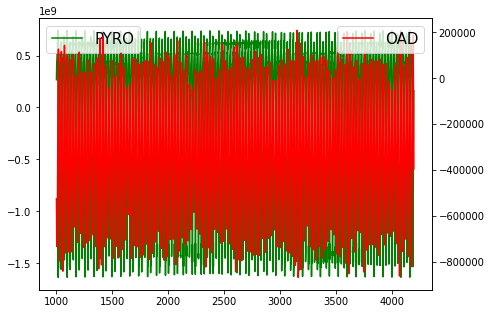

In [20]:
fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(df_01.y0[slace:slace+segment_size], color='green', label = 'PYRO')
ax2.plot(df_01.y1[slace:slace+segment_size], color='red', label='OAD')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

In [21]:
import numpy as np
import scipy.integrate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.optimize import curve_fit
import math

SAMPLE_RATE = 48_000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION


min_freq = 1_500
max_freq = 2_000



xf = rfftfreq(N, 1 / SAMPLE_RATE)

for j, freq_xf in enumerate(xf):
    if freq_xf > min_freq:
        min_ind = j-1
        break
for j, freq_xf in enumerate(xf):
    if freq_xf > max_freq:
        max_ind = j-1
        break
print(min_freq, xf[min_ind])
print(max_freq, xf[max_ind])

        
        
# min_freq = 1760
# max_freq = 1820


point_number = int(Size_pyro/N)
max_intensity_OAD = np.zeros(point_number)
max_index_OAD = np.zeros(point_number)
max_intensity_Pyro = np.zeros(point_number)
max_index_Pyro = np.zeros(point_number)

for i in range(point_number):
    Pyro = df_01.y0.values[i*N:i*N+N]
    OAD = df_01.y1.values[i*N:i*N+N]

    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)

    max_intensity_OAD[i] = np.max(np.abs(OAD_f[min_ind:max_ind]))
    max_index_OAD[i] = np.argmax(np.abs(OAD_f[min_ind:max_ind]))
    max_intensity_Pyro[i] = np.max(np.abs(Pyro_f[min_ind:max_ind]))
    max_index_Pyro[i] = np.argmax(np.abs(Pyro_f[min_ind:max_ind]))
#     print(xf[min_freq + np.argmax(np.abs(Pyro_f[min_freq:max_freq]))])
#     print(xf[min_freq + np.argmax(np.abs(OAD_f[min_freq:max_freq]))])
# print(max_index_OAD+min_ind)
# print(max_index_Pyro+min_ind)

1500 1500.0
2000 2000.0


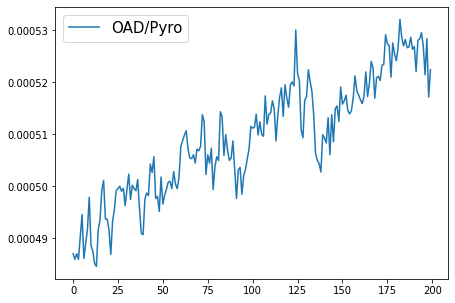

In [22]:
S_fourier = max_intensity_OAD/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

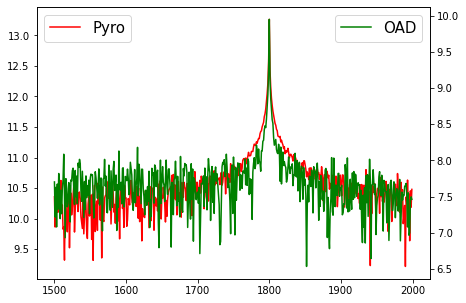

In [23]:
Pyro = df_01.y0.values[slace:slace+N]
Pyro_f = rfft(Pyro)

OAD = df_01.y1.values[slace:slace+N]
OAD_f = rfft(OAD)

fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_ind:max_ind], np.log10(np.abs(Pyro_f[min_ind:max_ind])), 'red', label='Pyro')
ax2.plot(xf[min_ind:max_ind], np.log10(np.abs(OAD_f[min_ind:max_ind])), color='green', label='OAD')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

In [24]:
SAMPLE_RATE = 48_000 #Hz
# Number of samples in normalized_tone
N = segment_size
DURATION = N/SAMPLE_RATE #sec


xf = rfftfreq(N, 1 / SAMPLE_RATE)

for j, freq_xf in enumerate(xf):
    if freq_xf > min_freq:
        min_ind = j-1
        break
for j, freq_xf in enumerate(xf):
    if freq_xf > max_freq:
        max_ind = j-1
        break
        
print(min_freq, xf[min_ind])
print(max_freq, xf[max_ind])

point_number = int(Size_pyro/N)
# print(point_number)
max_intensity_OAD = np.zeros(point_number)
max_index_OAD = np.zeros(point_number)
max_intensity_Pyro = np.zeros(point_number)
max_index_Pyro = np.zeros(point_number)


for i in range(point_number):
    
    Pyro = df_01.y0.values[i*N:i*N + N]
#     print(len(Pyro))
    OAD = df_01.y1.values[i*N:i*N + N]

    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)

    max_intensity_OAD[i] = np.max(np.abs(OAD_f[min_ind:max_ind]))
    max_index_OAD[i] = np.argmax(np.abs(OAD_f[min_ind:max_ind]))
    max_intensity_Pyro[i] = np.max(np.abs(Pyro_f[min_ind:max_ind]))
    max_index_Pyro[i] = np.argmax(np.abs(Pyro_f[min_ind:max_ind]))

#     print(xf[min_freq + np.argmax(np.abs(Pyro_f[min_freq:max_freq]))])
#     print(xf[min_freq + np.argmax(np.abs(OAD_f[min_freq:max_freq]))])
print(xf[min_ind+int(max_index_OAD.min())],xf[min_ind+int(max_index_OAD.max())])
print(xf[min_ind+int(max_index_Pyro.min())],xf[min_ind+int(max_index_Pyro.max())])


1500 1500.0
2000 1995.0
1800.0 1800.0
1800.0 1800.0


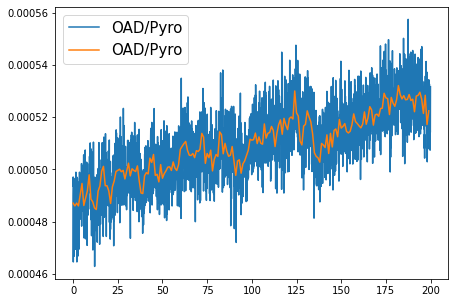

In [25]:
S_fourier_point = max_intensity_OAD/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot(np.arange(0,200,segment_size/SAMPLE_RATE),S_fourier_point, label='OAD/Pyro')
ax1.plot(np.arange(0,200,1),S_fourier, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

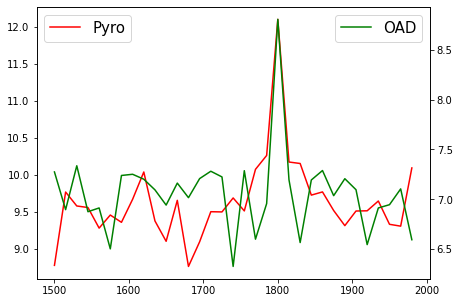

In [26]:
Pyro = df_01.y0.values[slace:slace+N]
Pyro_f = rfft(Pyro)

OAD = df_01.y1.values[slace:slace+N]
OAD_f = rfft(OAD)


fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_ind:max_ind], np.log10(np.abs(Pyro_f[min_ind:max_ind])), 'red', label='Pyro')
ax2.plot(xf[min_ind:max_ind], np.log10(np.abs(OAD_f[min_ind:max_ind])), color='green', label='OAD')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

In [27]:
wt = 'db1'
md = 'periodic'
lev = 6

Pyro = df_01.y0[:segment_size]
Oad = df_01.y1[:segment_size]

wp_oad = pywt.WaveletPacket(data=Oad, wavelet = wt, mode=md)
wp_pyro = pywt.WaveletPacket(data=Pyro, wavelet = wt, mode=md)

print(wp_oad.maxlevel)

print('Segment Size:', segment_size)
print('Size wp[a]:',len(wp_oad['a'].data))

list_natur = [node.path for node in wp_oad.get_level(lev, 'natural')] 

print('decomposition ' + str(lev) + ': ',len(list_natur))


matrix_data = np.zeros((2,len(list_natur), len(wp_oad[list_natur[0]].data)))
# print([node.path for node in wp_oad.get_level(6, 'freq')])


for j,coeff in enumerate(list_natur):
    matrix_data[0][j] = wp_pyro[coeff].data
    matrix_data[1][j] = wp_oad[coeff].data
                       
print(matrix_data.shape)
    
    
    
    
for i in range(int(Size_pyro/segment_size)):
    Pyro = df_01.y0[i*segment_size:(i+1)*segment_size]
    Oad = df_01.y1[i*segment_size:(i+1)*segment_size]
    wp_oad = pywt.WaveletPacket(data=Oad, wavelet = wt, mode=md)
    wp_pyro = pywt.WaveletPacket(data=Pyro, wavelet = wt, mode=md)
    for j,coeff in enumerate(list_natur):
        matrix_data[0][j] = wp_pyro[coeff].data
        matrix_data[1][j] = wp_oad[coeff].data
    np.savez_compressed('data_segment/natur_X/9_7_'+str(i), matrix_data)

11
Segment Size: 3200
Size wp[a]: 1600
decomposition 6:  64
(2, 64, 50)


In [28]:
loaded = np.load('data_segment/natur_X/9_7_0.npz')
print(loaded['arr_0'].shape)

(2, 64, 50)


        target    SMA_15
0     0.000494  0.000489
1     0.000497  0.000489
2     0.000464  0.000489
3     0.000487  0.000487
4     0.000490  0.000487
...        ...       ...
2995  0.000522  0.000521
2996  0.000507  0.000521
2997  0.000514  0.000521
2998  0.000514  0.000520
2999  0.000532  0.000519

[3000 rows x 2 columns]


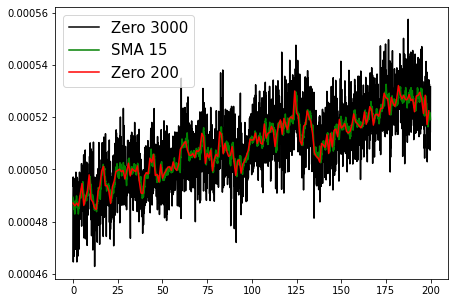

In [29]:
target_data = pd.DataFrame(S_fourier_point, columns = ['target'])
target_data['SMA_15'] = target_data.target.rolling(15, min_periods=1, center = True).mean()

print(target_data)

fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)

ax1.plot(np.arange(0,200,segment_size/SAMPLE_RATE),target_data.target, color = 'black', label='Zero 3000')
# ax1.plot(np.arange(0,200,segment_size/SAMPLE_RATE), target_data.SMA_5, color = 'yellow', label = 'SMA 5')
ax1.plot(np.arange(0,200,segment_size/SAMPLE_RATE), target_data.SMA_15, color = 'green', label = 'SMA 15')

ax1.plot(np.arange(0,200,1), S_fourier, color = 'red', label='Zero 200')


ax1.legend(prop={'size': 15})

In [30]:
np.savez_compressed('data_segment/Y_natur_9_7',target_data['SMA_15'])
loaded = np.load('data_segment/Y_natur_9_7.npz')
print(loaded['arr_0'].shape)
print(loaded['arr_0'])

(3000,)
[0.00048925 0.0004887  0.00048858 ... 0.00052086 0.00051954 0.00051907]


$$\bf Air$$

In [31]:
file_name = '../raw2/Air/001'
df_01 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 

for i in range(1,100):
    ind = f"0{i}" if i>=10 else f"00{i}"
    file_name = f"../raw2/Air/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"")
    df_01 = pd.concat([df_01, df], ignore_index=True)
print(df_01)

             x            y0      y1      y2          y3
0            0  6.192360e+08 -289792 -171008 -12788500.0
1            1  4.697960e+08 -230912 -148736 -11604200.0
2            2 -1.244080e+09 -199936 -174080  -8936190.0
3            3 -1.498400e+09 -172544 -170240  -2424060.0
4            4 -1.412470e+09 -156672 -176128   2249470.0
...        ...           ...     ...     ...         ...
9599995  95995 -2.100170e+07 -273664 -153856  15648500.0
9599996  95996  3.957480e+07 -329472 -164864  16781300.0
9599997  95997  1.904140e+08 -361984 -147200  12546800.0
9599998  95998  2.299390e+08 -390400 -151296  10861100.0
9599999  95999  3.261030e+08 -419840 -154368   9117440.0

[9600000 rows x 5 columns]


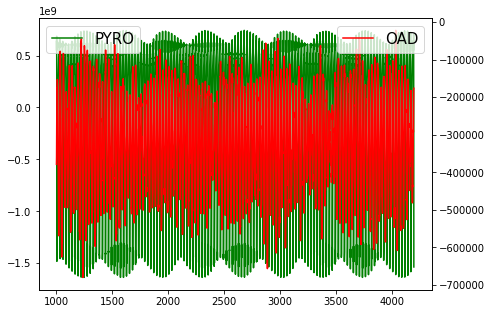

In [32]:
fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(df_01.y0[slace:slace+segment_size], color='green', label = 'PYRO')
ax2.plot(df_01.y1[slace:slace+segment_size], color='red', label='OAD')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

In [33]:
SAMPLE_RATE = 48_000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

xf = rfftfreq(N, 1 / SAMPLE_RATE)

for j, freq_xf in enumerate(xf):
    if freq_xf > min_freq:
        min_ind = j-1
        break
for j, freq_xf in enumerate(xf):
    if freq_xf > max_freq:
        max_ind = j-1
        break
print(min_freq, xf[min_ind])
print(max_freq, xf[max_ind])

        
        
# min_freq = 1760
# max_freq = 1820


point_number = int(Size_pyro/N)
max_intensity_OAD = np.zeros(point_number)
max_index_OAD = np.zeros(point_number)
max_intensity_Pyro = np.zeros(point_number)
max_index_Pyro = np.zeros(point_number)

for i in range(point_number):
    Pyro = df_01.y0.values[i*N:i*N+N]
    OAD = df_01.y1.values[i*N:i*N+N]

    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)

    max_intensity_OAD[i] = np.max(np.abs(OAD_f[min_ind:max_ind]))
    max_index_OAD[i] = np.argmax(np.abs(OAD_f[min_ind:max_ind]))
    max_intensity_Pyro[i] = np.max(np.abs(Pyro_f[min_ind:max_ind]))
    max_index_Pyro[i] = np.argmax(np.abs(Pyro_f[min_ind:max_ind]))
#     print(xf[min_freq + np.argmax(np.abs(Pyro_f[min_freq:max_freq]))])
#     print(xf[min_freq + np.argmax(np.abs(OAD_f[min_freq:max_freq]))])
# print(max_index_OAD+min_ind)
# print(max_index_Pyro+min_ind)

1500 1500.0
2000 2000.0


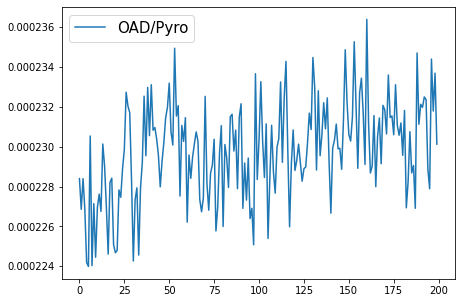

In [34]:
S_fourier = max_intensity_OAD/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

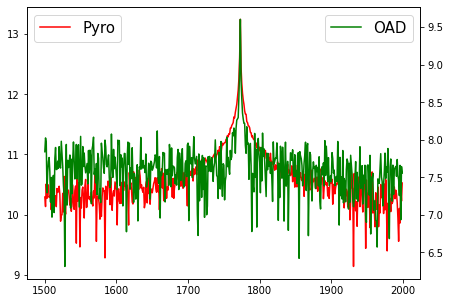

In [35]:
Pyro = df_01.y0.values[slace:slace+N]
Pyro_f = rfft(Pyro)

OAD = df_01.y1.values[slace:slace+N]
OAD_f = rfft(OAD)

fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_ind:max_ind], np.log10(np.abs(Pyro_f[min_ind:max_ind])), 'red', label='Pyro')
ax2.plot(xf[min_ind:max_ind], np.log10(np.abs(OAD_f[min_ind:max_ind])), color='green', label='OAD')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

In [36]:
SAMPLE_RATE = 48_000 #Hz
# Number of samples in normalized_tone
N = segment_size
DURATION = N/SAMPLE_RATE #sec


xf = rfftfreq(N, 1 / SAMPLE_RATE)

for j, freq_xf in enumerate(xf):
    if freq_xf > min_freq:
        min_ind = j-1
        break
for j, freq_xf in enumerate(xf):
    if freq_xf > max_freq:
        max_ind = j-1
        break
        
print(min_freq, xf[min_ind])
print(max_freq, xf[max_ind])

point_number = int(Size_pyro/N)
# print(point_number)
max_intensity_OAD = np.zeros(point_number)
max_index_OAD = np.zeros(point_number)
max_intensity_Pyro = np.zeros(point_number)
max_index_Pyro = np.zeros(point_number)


for i in range(point_number):
    
    Pyro = df_01.y0.values[i*N:i*N + N]
#     print(len(Pyro))
    OAD = df_01.y1.values[i*N:i*N + N]

    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)

    max_intensity_OAD[i] = np.max(np.abs(OAD_f[min_ind:max_ind]))
    max_index_OAD[i] = np.argmax(np.abs(OAD_f[min_ind:max_ind]))
    max_intensity_Pyro[i] = np.max(np.abs(Pyro_f[min_ind:max_ind]))
    max_index_Pyro[i] = np.argmax(np.abs(Pyro_f[min_ind:max_ind]))

#     print(xf[min_freq + np.argmax(np.abs(Pyro_f[min_freq:max_freq]))])
#     print(xf[min_freq + np.argmax(np.abs(OAD_f[min_freq:max_freq]))])
print(xf[min_ind+int(max_index_OAD.min())],xf[min_ind+int(max_index_OAD.max())])
print(xf[min_ind+int(max_index_Pyro.min())],xf[min_ind+int(max_index_Pyro.max())])


1500 1500.0
2000 1995.0
1770.0 1770.0
1770.0 1770.0


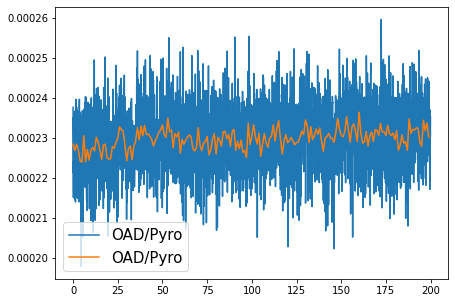

In [37]:
S_fourier_point = max_intensity_OAD/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot(np.arange(0,200,segment_size/SAMPLE_RATE),S_fourier_point, label='OAD/Pyro')
ax1.plot(np.arange(0,200,1),S_fourier, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

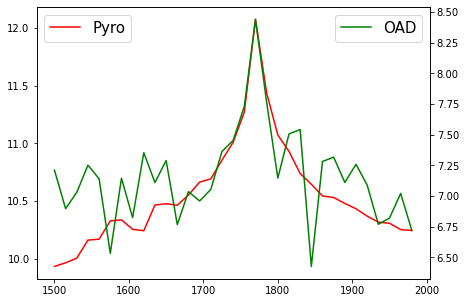

In [38]:
Pyro = df_01.y0.values[slace:slace+N]
Pyro_f = rfft(Pyro)

OAD = df_01.y1.values[slace:slace+N]
OAD_f = rfft(OAD)


fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_ind:max_ind], np.log10(np.abs(Pyro_f[min_ind:max_ind])), 'red', label='Pyro')
ax2.plot(xf[min_ind:max_ind], np.log10(np.abs(OAD_f[min_ind:max_ind])), color='green', label='OAD')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

In [39]:
wt = 'db1'
md = 'periodic'
lev = 6

Pyro = df_01.y0[:segment_size]
Oad = df_01.y1[:segment_size]

wp_oad = pywt.WaveletPacket(data=Oad, wavelet = wt, mode=md)
wp_pyro = pywt.WaveletPacket(data=Pyro, wavelet = wt, mode=md)

print(wp_oad.maxlevel)

print('Segment Size:', segment_size)
print('Size wp[a]:',len(wp_oad['a'].data))

list_natur = [node.path for node in wp_oad.get_level(lev, 'natural')] 

print('decomposition ' + str(lev) + ': ',len(list_natur))


matrix_data = np.zeros((2,len(list_natur), len(wp_oad[list_natur[0]].data)))
# print([node.path for node in wp_oad.get_level(6, 'freq')])


for j,coeff in enumerate(list_natur):
    matrix_data[0][j] = wp_pyro[coeff].data
    matrix_data[1][j] = wp_oad[coeff].data
                       
print(matrix_data.shape)
    
    
    
    
for i in range(int(Size_pyro/segment_size)):
    Pyro = df_01.y0[i*segment_size:(i+1)*segment_size]
    Oad = df_01.y1[i*segment_size:(i+1)*segment_size]
    wp_oad = pywt.WaveletPacket(data=Oad, wavelet = wt, mode=md)
    wp_pyro = pywt.WaveletPacket(data=Pyro, wavelet = wt, mode=md)
    for j,coeff in enumerate(list_natur):
        matrix_data[0][j] = wp_pyro[coeff].data
        matrix_data[1][j] = wp_oad[coeff].data
    np.savez_compressed('data_segment/natur_X/Air_'+str(i), matrix_data)

11
Segment Size: 3200
Size wp[a]: 1600
decomposition 6:  64
(2, 64, 50)


In [40]:
loaded = np.load('data_segment/natur_X/Air_0.npz')
print(loaded['arr_0'].shape)

(2, 64, 50)


        target    SMA_15
0     0.000238  0.000229
1     0.000221  0.000228
2     0.000224  0.000227
3     0.000215  0.000228
4     0.000235  0.000228
...        ...       ...
2995  0.000222  0.000229
2996  0.000226  0.000229
2997  0.000237  0.000229
2998  0.000230  0.000229
2999  0.000235  0.000228

[3000 rows x 2 columns]


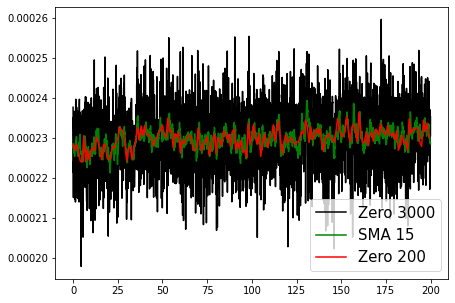

In [41]:
target_data = pd.DataFrame(S_fourier_point, columns = ['target'])

target_data['SMA_15'] = target_data.target.rolling(15, min_periods=1, center = True).mean()
print(target_data)

fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)

ax1.plot(np.arange(0,200,segment_size/SAMPLE_RATE),target_data.target, color = 'black', label='Zero 3000')
# ax1.plot(np.arange(0,200,segment_size/SAMPLE_RATE), target_data.SMA_5, color = 'yellow', label = 'SMA 5')
ax1.plot(np.arange(0,200,segment_size/SAMPLE_RATE), target_data.SMA_15, color = 'green', label = 'SMA 15')

ax1.plot(np.arange(0,200,1), S_fourier, color = 'red', label='Zero 200')


ax1.legend(prop={'size': 15})




# target = np.zeros(int(Size_pyro/segment_size))
# print(len(target))

In [42]:
np.savez_compressed('data_segment/Y_natur_Air',target_data['SMA_15'])
loaded = np.load('data_segment/Y_natur_Air.npz')
print(loaded['arr_0'].shape)
print(loaded['arr_0'])

(3000,)
[0.0002285  0.00022838 0.00022743 ... 0.0002287  0.00022897 0.00022847]
